In [123]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler

from sympy import *
import scipy as sc
import numpy as np
init_printing()

In [124]:
#Exponential growth
t = var("t")
C = Function('C')(t)
m,s,r = var("\mu_r,\sigma_r,r")

LHS = C.diff(t)
RHS = C*r
sol = dsolve(Eq(LHS,RHS))

C0 = C.subs({t:0})
C1 = sol.args[1].args[0]

#at t = 0
C1_sol = solve(sol.subs({t:0,C:C0}),C1)[0]
sol.subs({C1:C1_sol})

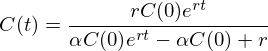

In [125]:
#with intraspecifc
a = var("alpha")

LHS = C.diff(t)
RHS = C*(r - a*C)
sol = dsolve(Eq(LHS,RHS))
C1_sol = solve(sol.subs({t:0}),C1)[0]
f = simplify(sol.subs({C1:C1_sol}))
f

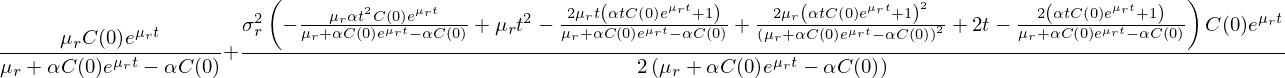

In [126]:
mean = f.args[1].subs({r:m}) + (s**2)/2 * f.args[1].diff(r,r).subs({r:m})
mean

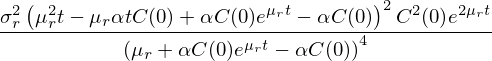

In [127]:
varience = simplify(s**2 * (f.args[1].diff(r).subs({r:m}))**2)
varience

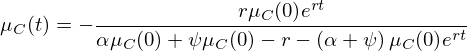

In [148]:
#with interspecifc (mean)
p = var("psi")
uC = Function('\mu_{C}')(t)
LHS = uC.diff(t)
RHS = uC*(r - a*uC - p*uC)
sol = dsolve(Eq(LHS,RHS))
C1_sol = solve(sol.subs({t:0}),C1)[0]
f = simplify(sol.subs({C1:C1_sol}))
f

In [ ]:
g = f.args[1] - uC
solve(g,uC)

In [65]:
LHS = C.diff(t)
RHS = C*(r - C - p*uC)
sol = dsolve(Eq(LHS,RHS))
C1 = sol.args[1].args[0]
C1_sol = solve(sol.subs({t:0}),C1)[0]
f = simplify(sol.subs({C1:C1_sol}))
f

IndexError: list index out of range

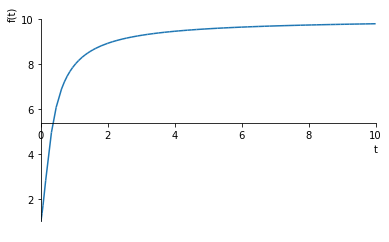

In [63]:
g = solve(f.args[1] - uC,uC)[0]
plot(g.subs({p:1.0,C.subs({t:0}):1.0,r:10.0}),(t,0,10))

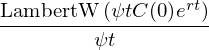

In [64]:
g